In [1]:
import sys, timeit
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 22, 'figure.figsize': (40, 8), 'font.family': 'serif', 'text.usetex': True, 'pgf.rcfonts': False, 'pgf.texsystem': 'pdflatex'})

%load_ext autoreload
%autoreload 2

sys.path.append('..')
import util
import Densities as de
import MultiIndex as mi
import Surrogates as su
import Transport as tm

plot_dir = open('plot.conf', 'r') .readlines()[0].rstrip()

# Hat function test target density

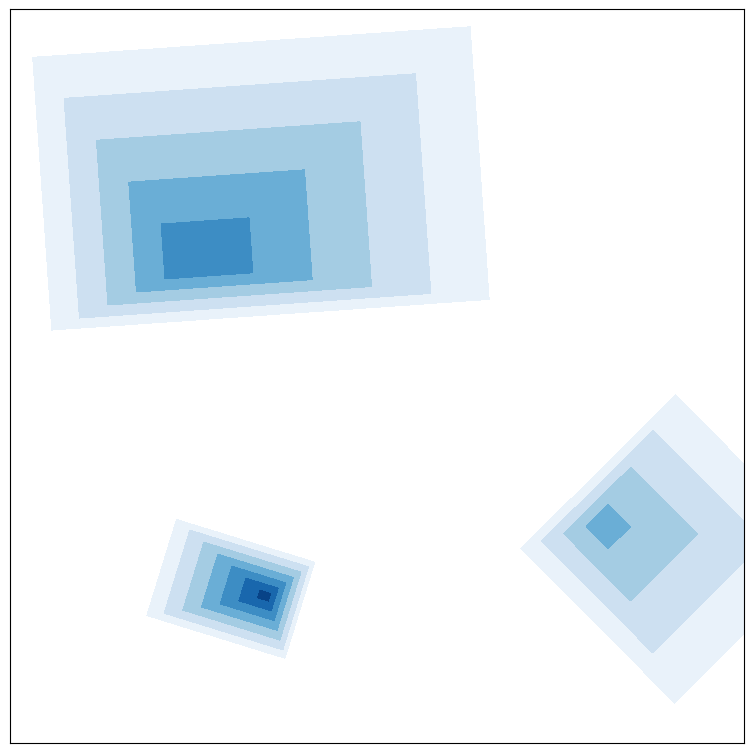

In [2]:
t_h = de.MultimodalDensity(densities=[de.Hat(c=(-.5,.3), m=1, x=(-.9,.3), y=(.15,.9), theta=-.07, scale=1),
                                      de.Hat(c=(.6,-.4), m=1, x=(.4,1.), y=(-.9, -.3), theta=5.5, scale=.7),
                                      de.Hat(c=(-.3,-.6), m=1, x=(-.6,-.2), y=(-.75, -.47), theta=.3, scale=1.3)])

qcs, _ = util.plot.plot_density(density=t_h, figsize=8, n=5000, filename=plot_dir+'hats_density.pdf')

# Surrogate density and samples distributed accordingly

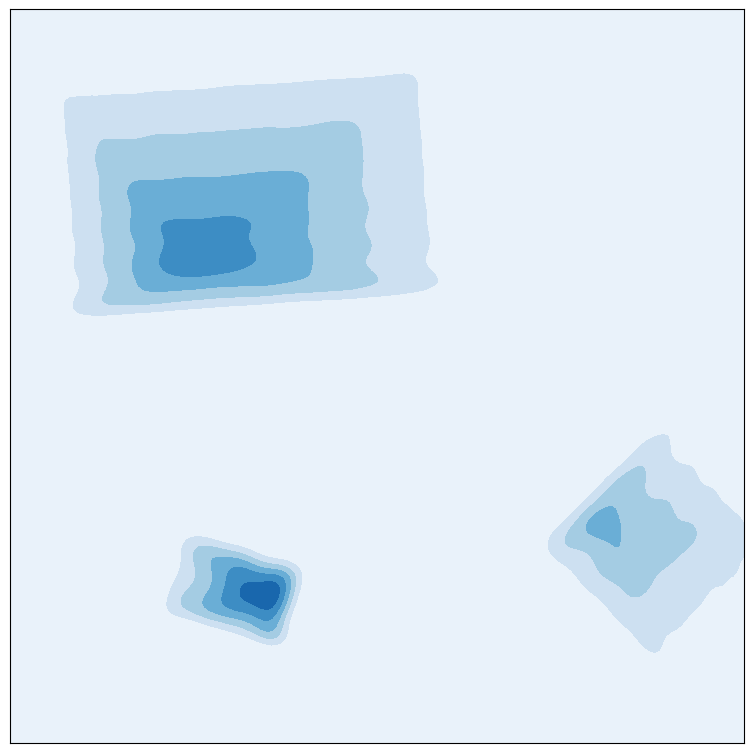

In [3]:
m_h = mi.TotalDegreeSet(dim=2, order=60)
s_h = su.Legendre(multis=m_h, target=t_h)
r_h = tm.TransportMap(s_h)

util.plot.plot_density(density=s_h, qcs=qcs, figsize=8);

In [4]:
p_uni_h, p_tar_h = r_h.samples(1000)

In [5]:
lines_h, lines_t_h = r_h.grid(xs=(-1, -.99 -.9, -.8, -.6, -.4, -.2, 0, .2, .4, .6, .66, .74, .8, .9, 1), ns=(50, 50, 10, 10, 10, 10, 10, 10, 10, 20, 100, 20, 20, 20))

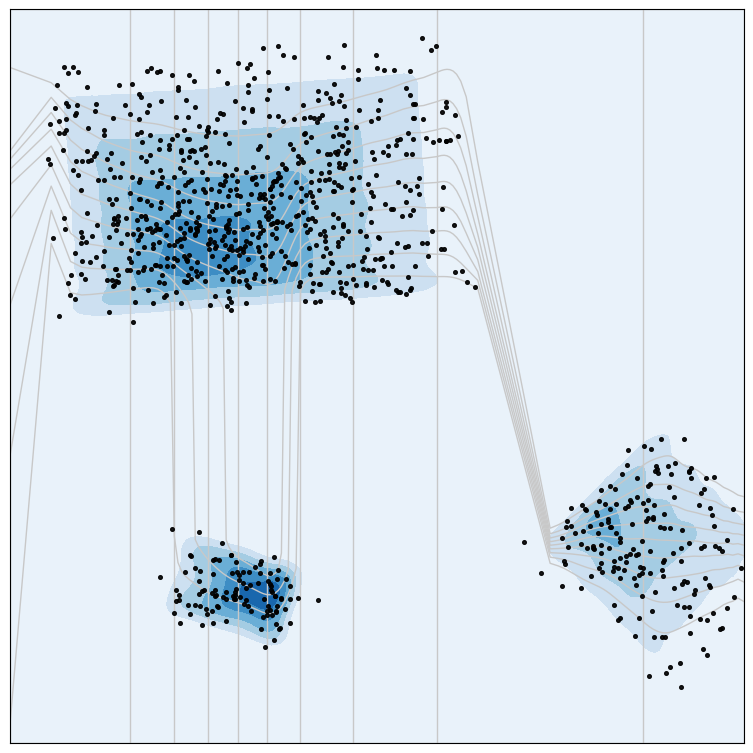

In [6]:
util.plot.plot_density(density=s_h, qcs=qcs, grid=lines_t_h, samples=p_tar_h, figsize=8, filename=plot_dir+'hats_samples.pdf');

# Convergence of $d_H$ and the WLS error

In [7]:
ks = [3,5,8,11,15,17,20,24,28,32,36,40,45,50,55,60][::-1]
dh = np.zeros((len(ks),))
ap = np.zeros((len(ks),))
xs = np.zeros((len(ks),))
ts = np.zeros((len(ks),))
for i,k in enumerate(ks) :
    m_m = mi.TotalDegreeSet(dim=2, order=k)
    s_m = su.Legendre(multis=m_m, target=t_h)
    e = s_m.computeError(n=1000, accurc=.001)
    dh[i] = e.hedist
    ap[i] = e.approx
    xs[i] = m_m.cardinality

    r_m = tm.TransportMap(s_m)
    ts[i] = timeit.timeit("r_m.samples(20)", globals=globals(), number=50) / 20 / 50
    print('.', end=' ')

. . . . . . . . . . . . . . . . 

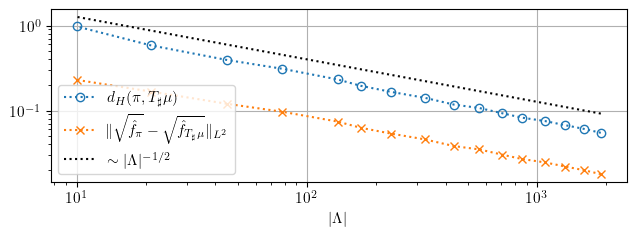

In [8]:
matplotlib.rcParams.update({"font.family": "serif", "text.usetex": True, "pgf.rcfonts": False})

tex = 0

if tex : matplotlib.use('pgf')
else :   matplotlib.use('module://matplotlib_inline.backend_inline')
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 11})

ax = util.plot.get_ax(fig=plt.figure(figsize=(6.5, 2.5)), xlabel=r'$|\Lambda|$', logaxis=['x', 'y'])
ax.plot(xs, dh, marker='o', linestyle='dotted', markerfacecolor='none', markersize=6, label=r'$d_H(\pi, T_\sharp \mu)$')
ax.plot(xs, ap, marker='x', linestyle='dotted', markerfacecolor='none', markersize=6, label=r'$\|\sqrt{\hat f_\pi} - \sqrt{\hat f_{T_\sharp \mu}}\|_{L^2}$')
ax.plot(xs, [4*x**(-.5) for x in xs], 'k:', label=r'$\sim |\Lambda|^{-1/2}$')
plt.legend(), plt.tight_layout()
if tex : plt.savefig(plot_dir+'hats_error.pgf', format='pgf')
else :   plt.show()